In [65]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [66]:
# 数据加载
def get_df(file):
    mylist = []
    for chunk in  pd.read_csv(file, chunksize=20000):
        mylist.append(chunk)
    temp_df = pd.concat(mylist, axis= 0)
    del mylist
    return temp_df

data=get_df("tianchi_fresh_comp_train_user.csv")

In [67]:
# 查看前几行
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


In [68]:
#查看数据量
len(data)

23291027

In [69]:
# 截取前20万条数据 用于数据处理分析
# data=data[:200000]
# print(len(data))

In [70]:
# 计算CVR
count_all=0
count_user=data['behavior_type'].value_counts()
count_all=count_user[1]+count_user[2]+count_user[3]+count_user[4]
cvr=count_user[4]/count_all
print('cvr={}%'.format(cvr*100))

cvr=0.9985776926023916%


In [71]:
# 时间转换
data['time']=pd.to_datetime(data['time'])
data.index=data['time']
print(data.head())

                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-08 18:00:00  10001082  285259775              1      97lk14c   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-02 15:00:00  10001082   53616768              1          NaN   
2014-12-12 11:00:00  10001082  151466952              1          NaN   

                     item_category                time  
time                                                    
2014-12-08 18:00:00           4076 2014-12-08 18:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-02 15:00:00           9762 2014-12-02 15:00:00  
2014-12-12 11:00:00           5232 2014-12-12 11:00:00  


In [72]:
from collections import defaultdict
from datetime import datetime,timedelta

def show_count_day(data):
    count_day=defaultdict(int)
    str1='2014-11-17'
    temp_date=datetime.strptime(str1,'%Y-%m-%d')
    delta=timedelta(days=1)
    for i in range(31):
        temp_date=temp_date+delta
        # 将时间转化成字符串类型
        temp_str=temp_date.strftime('%Y-%m-%d')
        count_day[temp_str]+=data[temp_str].shape[0]
    data_count_day=pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])

    plt.figure(figsize=(15,6))
    data_count_day['count'].plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

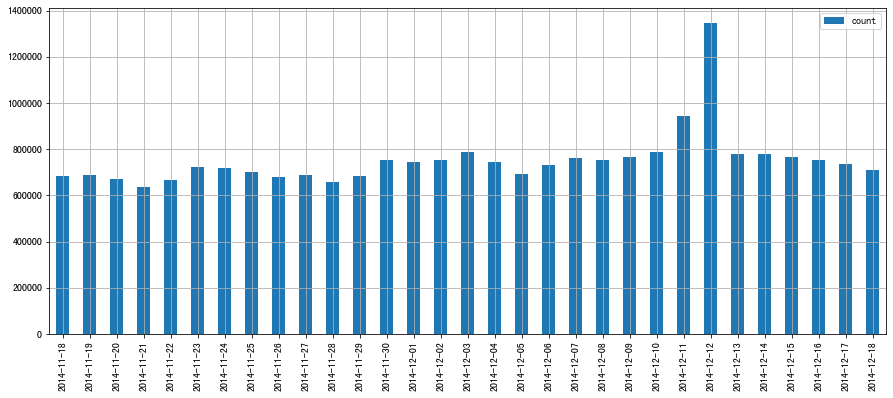

In [73]:
show_count_day(data)

In [74]:
# 属于商品子集p的操作次数
df=pd.read_csv('tianchi_fresh_comp_train_item.csv')
df.head()

,item_id,item_geohash,item_category
0,100002303,NaN,3368
1,100003592,NaN,7995
2,100006838,NaN,12630
3,100008089,NaN,7791
4,100012750,NaN,9614


In [75]:
data=pd.merge(data,df,on=['item_id']).set_index('time')
data.shape

(4279962, 7)

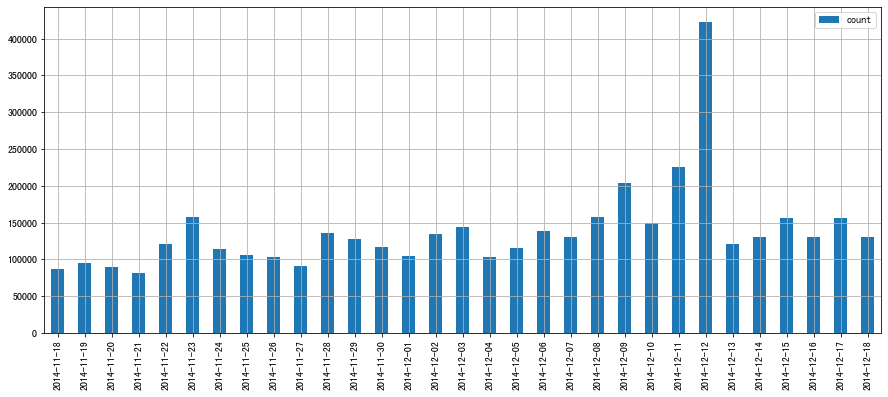

In [76]:
show_count_day(data)

In [77]:
#基于小时统计
def show_count_hour(date1):
    count_hour={}
    for i in range(24):
        time_str=date1+' %02.d'%i
        count_hour[time_str]=[0,0,0,0]
        temp=data[time_str]['behavior_type'].value_counts()
        # 每个类别的计数，索引0代表类别1，1代表类别2，2代表类别3，3代表类别4
        for  j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1]+=temp[temp.index[j]]
    data_count_hour=pd.DataFrame.from_dict(count_hour,orient='index')
    
    data_count_hour.plot(kind='bar',figsize=(15,6))
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

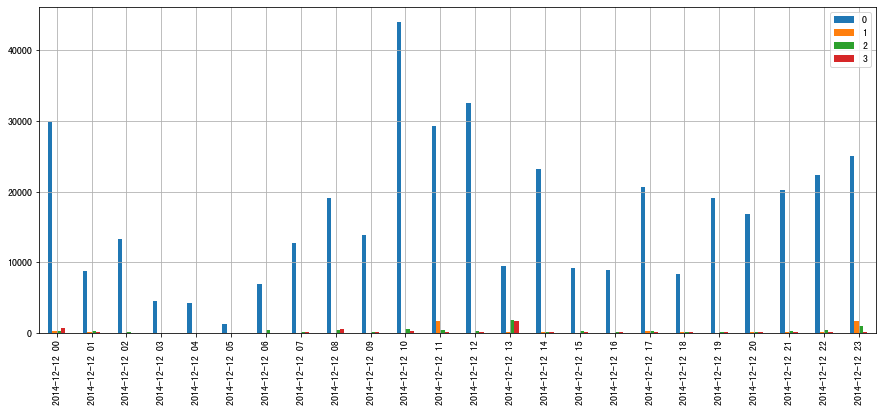

In [78]:
show_count_hour('2014-12-12')